In [13]:
import numpy as np
import matplotlib.pyplot as plt
import math

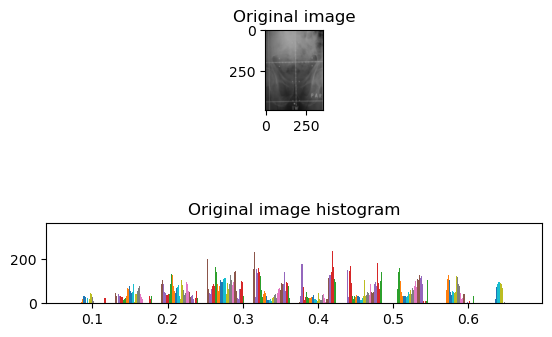

In [24]:
x = plt.imread('x-ray.png')

plt.figure(1)
plt.subplot(411)
plt.title('Original image')
plt.imshow(x)
plt.subplot(413)
plt.title('Original image histogram')
plt.hist(x[:,:,0])
plt.show()

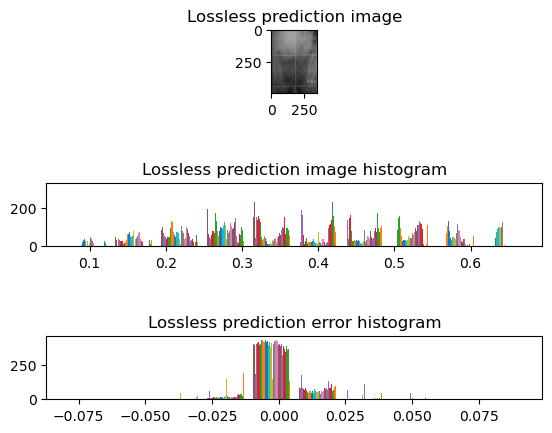

In [15]:
#Lossless Predictive Coding

xp_lossless = np.zeros((x.shape[0]-1,x.shape[1]-1,x.shape[2]))
e_lossless = np.zeros((x.shape[0]-1,x.shape[1]-1,x.shape[2]))

for i in range(0, xp_lossless.shape[0], 1):
    for j in range(0, xp_lossless.shape[1], 1):
        xp_lossless[i,j] = (x[i+1,j]+x[i,j+1])/2

e_lossless = x[1:,1:] - xp_lossless

plt.figure(2)
plt.subplot(511)
plt.title('Lossless prediction image')
plt.imshow(xp_lossless)
plt.subplot(513)
plt.title('Lossless prediction image histogram')
plt.hist(xp_lossless[:,:,0])
plt.subplot(515)
plt.title('Lossless prediction error histogram')
plt.hist(e_lossless[:,:,0])
plt.show()

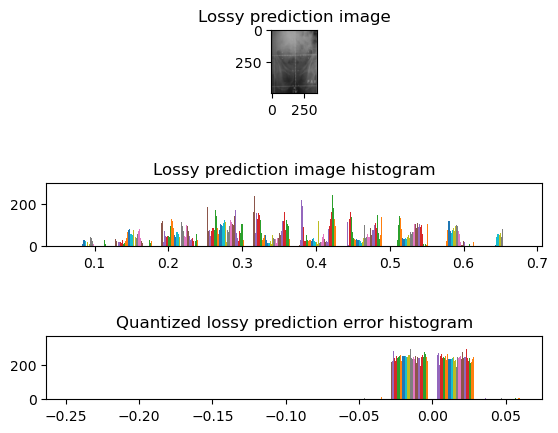

In [16]:
#Lossy Predictive Coding

def quantize(_input):
    if _input <= -40/255: return -64/255
    elif _input <= -10/255: return -16/255
    elif _input <= 0: return -4/255
    elif _input <= 10/255: return 4/255
    elif _input <= 40/255: return 16/255
    else: return 64/255

x_rec = np.zeros((x.shape[0],x.shape[1],x.shape[2]))    
xp_lossy = np.zeros((x.shape[0],x.shape[1]-1,x.shape[2]))
eq_lossy = np.zeros((x.shape[0],x.shape[1]-1,x.shape[2]))

x_rec[:,0] = x[:,0]

for j in range(0, xp_lossy.shape[1], 1):
    xp_lossy[0,j] = x_rec[0,j]
    eq_lossy[0,j] = quantize(x[0,j+1,0] - xp_lossy[0,j,0])
    x_rec[0,j+1] = xp_lossy[0,j] + eq_lossy[0,j]
        
for i in range(1, xp_lossy.shape[0], 1):
    for j in range(0, xp_lossy.shape[1], 1):
        if (abs(x_rec[i-1,j,0] - x_rec[i-1,j+1,0]) <= abs(x_rec[i,j,0] - x_rec[i-1,j,0])):
            xp_lossy[i,j] = x_rec[i,j]
            eq_lossy[i,j] = quantize(x[i,j+1,0] - xp_lossy[i,j,0])
            x_rec[i,j+1] = xp_lossy[i,j] + eq_lossy[i,j]
        else:
            xp_lossy[i,j] = x_rec[i-1,j+1]
            eq_lossy[i,j] = quantize(x[i,j+1,0] - xp_lossy[i,j,0])
            x_rec[i,j+1] = xp_lossy[i,j] + eq_lossy[i,j]

plt.figure(3)
plt.subplot(511)
plt.title("Lossy prediction image")
plt.imshow(xp_lossy)
plt.subplot(513)
plt.title("Lossy prediction image histogram")
plt.hist(xp_lossy[:,:,0])
plt.subplot(515)
plt.title("Quantized lossy prediction error histogram")
plt.hist(eq_lossy[:,:,0])
plt.show()

In [17]:
#Comparison-SNR

def power_E(_input):
    summation, counter = 0, 0
    for i in range(0, _input.shape[0], 1):
        for j in range(0, _input.shape[1], 1):
            summation =+ _input[i,j]**2
            counter =+ 1
    return summation/counter

signal = 255*x[:,:,0]
noise_lossless = 255*e_lossless[:,:,0]
noise_lossy = 255*eq_lossy[:,:,0]

signal_power = power_E(signal)
noise_power_lossless = power_E(noise_lossless)
noise_power_lossy = power_E(noise_lossy)

print('SNR Lossless = {:.2f} dB'.format(10*math.log(signal_power/noise_power_lossless)))
print('SNR Lossy = {:.2f} dB'.format(10*math.log(signal_power/noise_power_lossy)))

SNR Lossless = 79.59 dB
SNR Lossy = 65.73 dB
